<a href="https://colab.research.google.com/github/HaidarDiab/yandexMlCourse/blob/main/homeworks/hw01_classification/01_hw_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Классификация MNIST

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), https://t.me/s/girafe_ai

In [33]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output


import torch.optim as optim
import torchvision.transforms as transforms

Давайте обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В этом задании мы воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплайн обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку с первого занятия.

Мы настоятельно рекомендуем писать код «с нуля», лишь изредка подглядывая в готовые примеры, а не просто «копировать-вставлять». Это поможет вам в будущем.

Text(0.5, 1.0, 'Image label: 0')

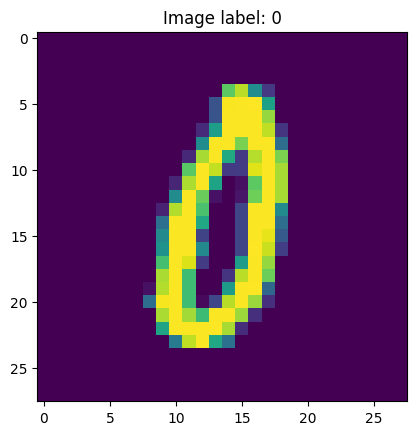

In [34]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель, представленную ниже. Пожалуйста, не создавайте чрезмерно сложную сеть — она не должна быть глубже четырёх слоёв (можно и меньше). Ваша основная задача — обучить модель и добиться как минимум 92% точности на тестовой выборке (hold-out выборке).

*Примечание: линейных слоёв и функций активации должно быть достаточно.*

__Обратите внимание, ваша модель должна быть представлена переменной `model`__

In [44]:
# Creating model instance

class MyMinsitModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 128)
    self.fc4 = nn.Linear(128, 10)   # Output layer with 10 classes (digits 0-9)
    self.dropout = nn.Dropout(p=0.5)  # Adding dropout to prevent overfitting
    self.activation = nn.ReLU()

  def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))    # First hidden layer + ReLU
        x = self.dropout(x)        # Apply dropout
        x = F.relu(self.fc2(x))    # Second hidden layer + ReLU
        x = self.dropout(x)        # Apply dropout
        x = F.relu(self.fc3(x))    # Third hidden layer + ReLU
        x = self.fc4(x)            # Output layer (no activation here, we'll apply softmax later)
        return x

minsit_model = MyMinsitModel()

Ниже доступны локальные тесты для проверки вашей модели:

In [45]:
# do not change the code in the block below
# __________start of block__________
assert minsit_model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = minsit_model(x)
except Exception as e:
    print('Something is wrong with the model')
    raise e


assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Обучите модель на обучающей выборке. Рекомендуем поэкспериментировать с

---

различными оптимизаторами.

---




In [47]:
# Loss function
loss_function = nn.CrossEntropyLoss()

# Optimizer (you can experiment: Adam, SGD, etc.)
optimizer = optim.Adam(minsit_model.parameters(), lr=0.001, weight_decay=0.0001)

# Training loop
num_epochs = 15  # Start with 5 epochs (can increase)

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_data_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = minsit_model(images)

        # Compute loss
        loss = loss_function(outputs, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

    # Print loss after each epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_data_loader):.4f}')

print('Training finished!')

Epoch [1/15], Loss: 0.3369
Epoch [2/15], Loss: 0.1845
Epoch [3/15], Loss: 0.1587
Epoch [4/15], Loss: 0.1432
Epoch [5/15], Loss: 0.1328
Epoch [6/15], Loss: 0.1280
Epoch [7/15], Loss: 0.1238
Epoch [8/15], Loss: 0.1185
Epoch [9/15], Loss: 0.1175
Epoch [10/15], Loss: 0.1140
Epoch [11/15], Loss: 0.1106
Epoch [12/15], Loss: 0.1078
Epoch [13/15], Loss: 0.1088
Epoch [14/15], Loss: 0.1097
Epoch [15/15], Loss: 0.1050
Training finished!


Также помните, что вы всегда можете обратиться к отличной [документации](https://pytorch.org/docs/stable/index.html) и [учебным материалам](https://pytorch.org/tutorials/).

Оценим качество классификации:

In [48]:
predicted_labels = []
real_labels = []
minsit_model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = minsit_model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [49]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.98762


In [50]:
predicted_labels = []
real_labels = []
minsit_model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = minsit_model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [51]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9783


Проверка, что пороги пройдены:

In [52]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

Обращаем внимане, код ниже предполагает, что ваша модель имеет содержится в переменной `model`, а файл `hw_mnist_data_dict.npy` находится в той же директории, что и ноутбук (он доступен в репозитории).

In [53]:
# do not change the code in the block below
# __________start of block__________
import os
import json
assert os.path.exists('hw_mnist_data_dict.npy'), 'Please, download `hw_mnist_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))

    predicted_labels = torch.cat(predicted_labels).numpy()
    predicted_labels = ','.join([str(x) for x in list(predicted_labels)])
    return predicted_labels

loaded_data_dict = np.load('hw_mnist_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test']))
}

with open('submission_dict_mnist_task_1.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
print('File saved to `submission_dict_mnist_task_1.json`')
# __________end of block__________

AssertionError: Please, download `hw_mnist_data_dict.npy` and place it in the working directory

### Сдача задания
Сдайте сгенерированный файл в соответствующую задачу в соревновании, а именно:
    
* `submission_dict_mnist_task_1.json` в задачу Warmup (hw_mnist)

На этом задание завершено. Поздравляем!